In [54]:
import numpy as np
def MapOverlap( a, b):
    Intersect = np.logical_and(a, b)
    Union=np.logical_or(a, b)
    return np.count_nonzero(Intersect)/np.count_nonzero(Union)

In [55]:
from scipy.stats import entropy
def KL(a,b):
    return (entropy(a,b)+entropy(b,a))/2

In [56]:
from sklearn import metrics
def LayerOverlap(A,B):
    D=[]
    for i,a in enumerate(A):
        D.append([])
        print(i)
        for j,b in enumerate(B):
#             score=metrics.mutual_info_score(a,b)
            score=MapOverlap(a,b)
#             score=KL(a,b)
            D[i].append(score)
    return D

In [114]:
from nilearn.datasets import load_mni152_brain_mask
mask_img = load_mni152_brain_mask()

from nilearn import image
GLM=image.load_img('/home/share/TmpData/Qinglin/HCP_4mm_GLM/EMOTION/IC1_high.nii.gz')

from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_img,standardize=True)

masker.fit()
maps_GLM=masker.transform(GLM)

In [120]:

map1=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/MOTOR_map1.npy')
map2=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/MOTOR_map2.npy')
map3=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/MOTOR_map3.npy')
D1=LayerOverlap(map1,maps_GLM)
D2=LayerOverlap(map2,maps_GLM)
D3=LayerOverlap(map3,maps_GLM)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [59]:
task={'EMOTION', 'GAMBLING', 'LANGUAGE', 'MOTOR', 'RELATIONAL', 'SOCIAL', 'WM'};

% for taski=1:7
%     TASK=(task{taski});
%     load(strcat('/srv1/HCP_4mm_GLM/',TASK,'GLM.mat'),'M');
%     T{taski}=M;
% end

load('/srv1/HCP_4mm_GLM/EMOTIONGLM.mat','M');
load('/home/uga_qinglin/Documents/github/myDBN/EMOTION100/layer1.mat','layer1');
load('/home/uga_qinglin/Documents/github/myDBN/EMOTION100/layer2.mat','layer2');
load('/home/uga_qinglin/Documents/github/myDBN/EMOTION100/layer3.mat','layer3');
[ D1 ] = LayerOverlap( M,layer1 );
[ D2 ] = LayerOverlap( M,layer2 );
[ D3 ] = LayerOverlap( M,layer3 );
subplot(2,2,1), imagesc(D1)
subplot(2,2,2), imagesc(D2)
subplot(2,2,3), imagesc(D3)
[nah, I1]=max(D1,[],2);
% [nah I2]=max(D2,[],2);
% [nah I3]=max(D3,[],2);

%%sort by overlap rate, for each pair or GLM cope  -- DBN layer map 
for i=1:6
[nah idx]=sort(D1(i,:),'descend');
% Visualize_High( layer1(idx,:),strcat('./cope',int2str(i),'layer1') );
end

for i=1:6
[nah idx]=sort(D2(i,:),'descend');
% Visualize_High( layer2(idx,:),strcat('./cope',int2str(i),'layer2') );
end

for i=1:6
[nah idx]=sort(D3(i,:),'descend');
% Visualize_High( layer3(idx,:),strcat('./cope',int2str(i),'layer3') );
end

SyntaxError: invalid syntax (<ipython-input-59-247fe6d2a687>, line 24)

In [75]:
# D1 = np.asarray(D)
# D1[D1==1]=0

/usr/local/lib/python3.5/dist-packages/seaborn/matrix.py:682: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0.0
  ax.set_xlim(0, max_dependent_coord * 1.05)


<Figure size 432x288 with 0 Axes>

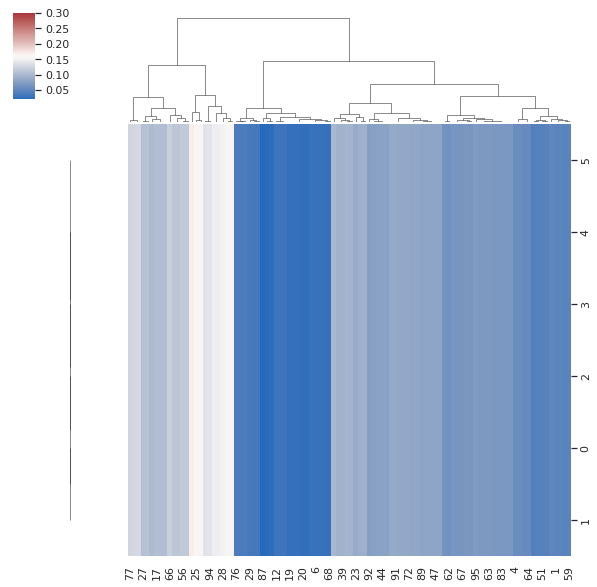

<Figure size 432x288 with 0 Axes>

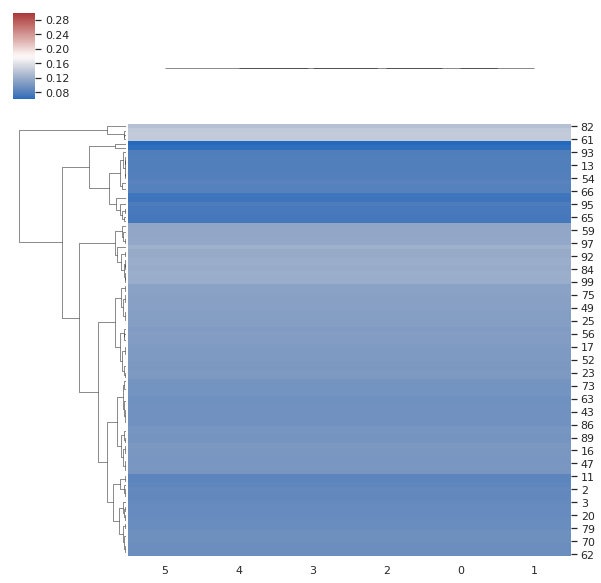

<Figure size 432x288 with 0 Axes>

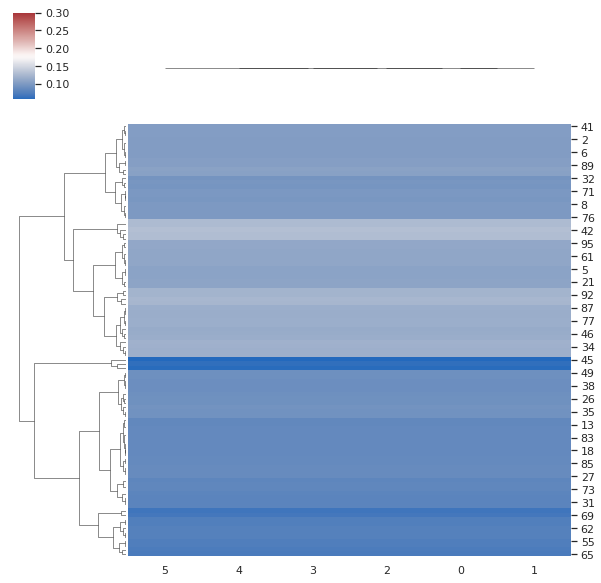

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.clustermap(D1,cmap="vlag",vmax=.3)
plt.figure()
sns.clustermap(D2,cmap="vlag",vmax=.3)
plt.figure()
sns.clustermap(D3,cmap="vlag",vmax=.3)